In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
%matplotlib inline 

In [3]:
#import and clean data set
def read_auto_data(fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"):
    'Function to load the auto price data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    auto_price = pd.read_csv(fileName, index_col=None)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_price.loc[auto_price[column] == '?', column] = np.nan
    auto_price.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_price[column] = pd.to_numeric(auto_price[column])
        
    return auto_price
auto_price = read_auto_data()

In [4]:
print(auto_price.shape)
print(auto_price.dtypes)

(195, 26)
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [6]:
#auto_price.head(10)

In [120]:
#create log price
#auto_price['log_price'] = np.log(auto_price.price)

In [122]:
#diesal = auto_price.loc[auto_price.loc[:, 'fuel-type'] == 'diesal', 'make']
# gas = auto_price.loc[(auto_price['fuel-type'] == 'gas') & (auto_price['price'])]
# gas

In [11]:
diesel = auto_price[auto_price['fuel-type'] == 'diesel']
gas =  auto_price[auto_price['fuel-type'] == 'gas']

len(diesel), len(gas)

(20, 175)

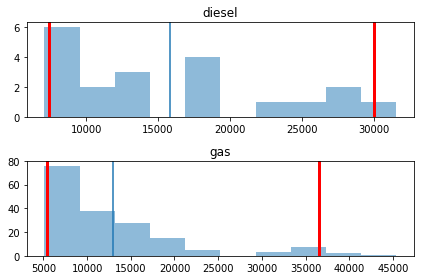

In [18]:
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(x.mean())
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)
    
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pd.concat([a, b])
    breaks = np.linspace(
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    plt.subplot(2, 1, 1)
    plot_hist(a)
    plt.title(a_label)
    
    plt.subplot(2, 1, 2)
    plot_hist(b)
    plt.title(b_label)
    
    plt.tight_layout()
    

plot_dists(diesel.price, gas.price, 20, a_label='diesel', b_label='gas')

In [19]:
diesel.sample(frac=1, replace=True).head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
159,0,91,toyota,diesel,std,four,hatchback,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,38,47,7788
182,2,122,volkswagen,diesel,std,two,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,52,4800,37,46,7775
68,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
110,0,?,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.0,95,4150,25,25,13860
158,0,91,toyota,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898


In [20]:
diesel.sample(frac=1, replace=True).price.mean()

14283.05

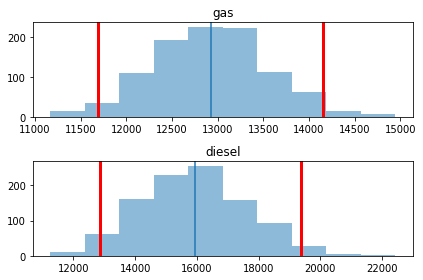

In [23]:
n_replicas = 1000

diesel_bootstrap_means = pd.Series([
    diesel.sample(frac=1, replace=True).price.mean()
    for i in range(n_replicas)])

gas_bootstrap_means = pd.Series([
        gas.sample(frac=1, replace=True).price.mean()
        for i in range(n_replicas)])

plot_dists(gas_bootstrap_means, diesel_bootstrap_means, 
           nbins=80, a_label='gas', b_label='diesel')

### Compare and test Normality of the distributions of price and log price

In [123]:
#create price and log_price lists
norm1 = auto_price.price.tolist()
norm2 = auto_price.log_price.tolist()

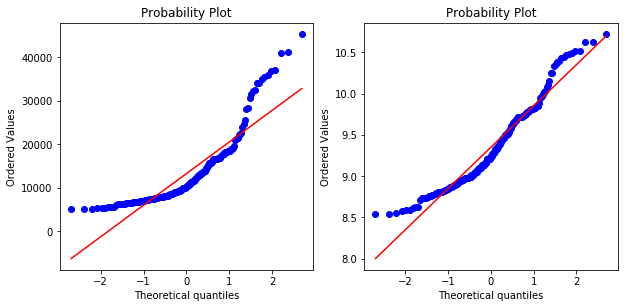

In [124]:
### Compare using Q-Q plot 
def qq_plot(vec1, vec2):
    plt.figure(figsize=(10, 10)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
qq_plot(norm1, norm2) 

Text(0.5,1,'Q-Q plot of two distributions')

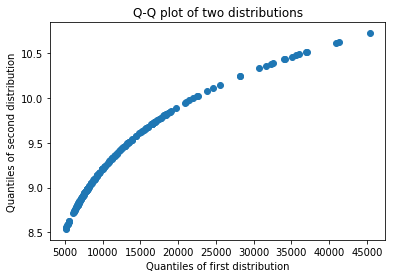

In [125]:
#test if two samples have similar distributions using the same plot
plt.scatter(x = sorted(norm1), y = sorted(norm2))
plt.xlabel('Quantiles of first distribution')
plt.ylabel('Quantiles of second distribution')
plt.title('Q-Q plot of two distributions')

### Kolmogorov-Smirnov Test for Distributions

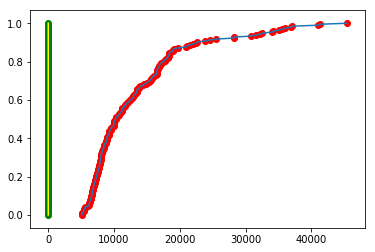

In [126]:
# plot the cumulative distribution functions of the two samples
def plot_cums(dist1, dist2):
    ## sort the first data sample:
    data_sorted = np.sort(dist1)
    
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red')
    
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green')

plot_cums(norm1, norm2)   

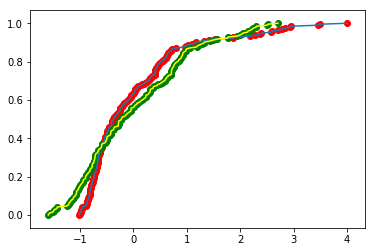

In [127]:
#standardize (zero mean, unit standard deviation) the two samples and plot the cumulative distribution function
from sklearn.preprocessing import scale
norm1_s = scale(norm1)
norm2_s = scale(norm2)
plot_cums(norm1_s, norm2_s)  

In [128]:
#compute the K-S statistic, maximum vertical distance between the two cumulative density functions, and the p-valu
def ks_test(dat, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))
ks_test(norm1_s)   

KS-statistic = 0.15672300254932997
P-value = 0.00011937821625407352


### Test significance of price (or log price) stratified by a) fuel type, b) aspiration, and c) rear vs. front wheel drive.

In [129]:
#understand mean and counts
def count_mean(dat):
    groups = dat.groupby('fuel-type') # Create the groups
    ## Create a data frame with the counts and the means of the groups
    return pd.DataFrame({'count': groups.size(), 
                        'mean': groups.aggregate(np.mean).loc[:, 'price']})
count_mean(auto_price)

,count,mean
fuel-type,,
diesel,20,15838.15
gas,175,12952.00


In [130]:
#test stratify
p = 0.05
def stratify(dat, p):
    groups = dat.groupby('fuel-type') # Create the groups
    nums = min(groups.size()) # Find the size of the smallest group
    num = int(p * dat.shape[0]) # Compute the desired number of samples per group
    if num <= nums: # If sufficient group size, sample each group and return. 
        return groups.apply(lambda x: x.sample(n=num))
    else: # Oops. p is to large
        pmax = nums / dat.shape[0]
        print('The maximum value of p = ' + str(pmax))
stratified = stratify(auto_price, p)
count_mean(stratified)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'fuel-type' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,count,mean
fuel-type,,
diesel,9,16551.555556
gas,9,13580.444444


In [131]:
#create histograms
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

In [132]:
#define t-test
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)

In [133]:
#assign values for a) fuel type, b) aspiration, and c) rear vs. front wheel drive.
diesel = auto_price.loc[auto_price.loc[:, 'fuel-type'] == 'diesel', 'price']
gas = auto_price.loc[auto_price.loc[:, 'fuel-type'] == 'gas', 'price']
std = auto_price.loc[auto_price.loc[:, 'aspiration'] == 'std', 'price']
turbo = auto_price.loc[auto_price.loc[:, 'aspiration'] == 'turbo', 'price']
rwd = auto_price.loc[auto_price.loc[:, 'drive-wheels'] == 'rwd', 'price']
fwd = auto_price.loc[auto_price.loc[:, 'drive-wheels'] == 'fwd', 'price']

In [134]:
#define plot
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

DegFreedom      23.931783
Difference    2886.150000
Statistic        1.522895
PValue           0.129422
Low95CI       -909.857869
High95CI      6682.157869
dtype: float64


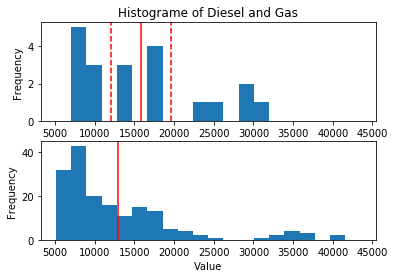

In [135]:
test_fuel = t_test(diesel, gas, alpha = 0.05)
print(test_fuel)
def plot_t_fuel(a, b, t_test, cols=['Diesel', 'Gas'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
plot_t(diesel, gas, test_fuel) 

DegFreedom      66.865743
Difference   -3687.572851
Statistic       -2.513673
PValue           0.012766
Low95CI      -6126.462352
High95CI     -1248.683350
dtype: float64


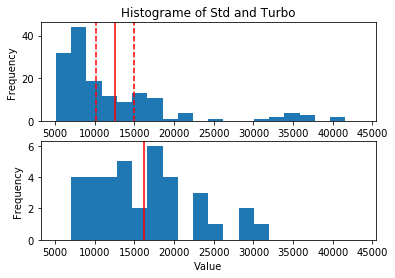

In [136]:
test_aspiration = t_test(std, turbo, alpha = 0.05)
print(test_aspiration)
def plot_t_aspiration(a, b, t_test, cols=['Std', 'Turbo'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
plot_t_aspiration(std, turbo, test_aspiration) 

DegFreedom    8.171473e+01
Difference    1.089846e+04
Statistic     1.158637e+01
PValue        1.083338e-23
Low95CI       8.643096e+03
High95CI      1.315382e+04
dtype: float64


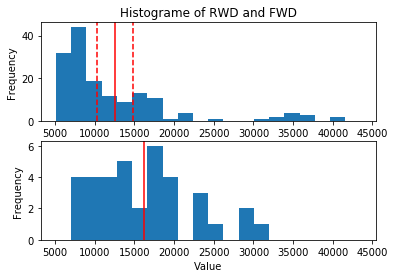

In [137]:
test_drive = t_test(rwd, fwd, alpha = 0.05)
print(test_drive)
def plot_t_drive(a, b, t_test, cols=['RWD', 'FWD'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
plot_t_drive(std, turbo, test_drive)

### Apply ANOVA and Tukey's HSD test to the auto price data 

In [138]:
#get budy-style data
auto_price['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

Text(0.5,1,'Box plot by body style')

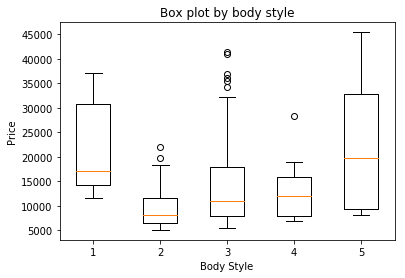

In [139]:
#assign body styles to variables
con = auto_price.loc[auto_price.loc[:, 'body-style'] == 'convertible', 'price'].tolist()
hback = auto_price.loc[auto_price.loc[:, 'body-style'] == 'hatchback', 'price'].tolist()
sed = auto_price.loc[auto_price.loc[:, 'body-style'] == 'sedan', 'price'].tolist()
wag = auto_price.loc[auto_price.loc[:, 'body-style'] == 'wagon', 'price'].tolist()
htop = auto_price.loc[auto_price.loc[:, 'body-style'] == 'hardtop', 'price'].tolist()

plt.boxplot([con, hback, sed, wag, htop])
plt.ylabel('Price')
plt.xlabel('Body Style')
plt.title('Box plot by body style')

In [140]:
f_statistic, p_value = ss.f_oneway(con, hback, sed, wag, htop) # fill in parameters
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 9.004940478691072
P-value = 1.1106545919290286e-06


In [141]:
#get length of variables
print(len(con))
print(len(hback))
print(len(sed))
print(len(wag))
print(len(htop))

6
63
94
24
8


In [142]:
#Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df = pd.DataFrame({'vals': con + hback + sed + wag + htop,
                   'group_num': ['1'] * 6 + ['2'] * 63 + ['3'] * 94 + ['4'] * 24 + ['5'] * 8})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05  
group1 group2   meandiff     lower      upper    reject
-------------------------------------------------------
  1      2    -12126.5159 -20909.4848 -3343.5469  True 
  1      3     -7430.7447 -16086.8623  1225.373  False 
  1      4     -9390.3333 -18773.3413  -7.3254    True 
  1      5       318.0    -10784.1247 11420.1247 False 
  2      3     4695.7712   1348.5969  8042.9455   True 
  2      4     2736.1825   -2194.9472 7667.3123  False 
  2      5     12444.5159  4728.7932  20160.2385  True 
  3      4     -1959.5887  -6661.0639 2741.8866  False 
  3      5     7748.7447    177.7338  15319.7555  True 
  4      5     9708.3333   1315.9159  18100.7508  True 
-------------------------------------------------------


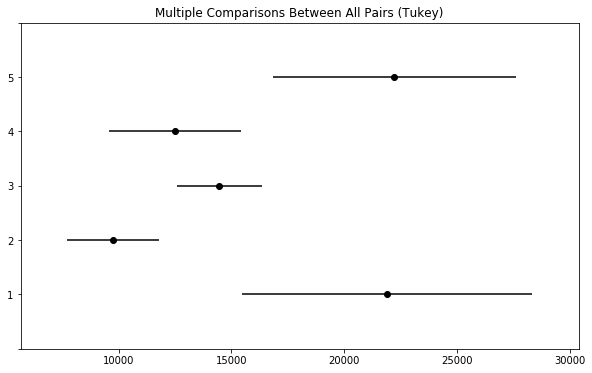

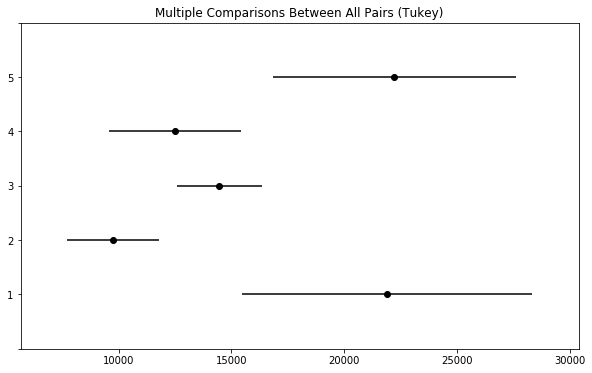

In [143]:
Tukey_HSD.plot_simultaneous()

### Additional category analysis

In [144]:
#understand data
auto_price['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', 'idi', 'spdi'], dtype=object)

In [145]:
#determine count and means
def count_mean_1(dat):
    groups = dat.groupby('fuel-system') # Create the groups
    ## Create a data frame with the counts and the means of the groups
    return pd.DataFrame({'count': groups.size(), 
                        'mean': groups.aggregate(np.mean).loc[:, 'price']})
count_mean_1(auto_price)

,count,mean
fuel-system,,
1bbl,11,7555.545455
2bbl,64,7433.203125
idi,20,15838.150000
mfi,1,12964.000000
mpfi,89,17807.168539
spdi,9,10990.444444
spfi,1,11048.000000


Text(0.5,1,'Box plot by fuel system')

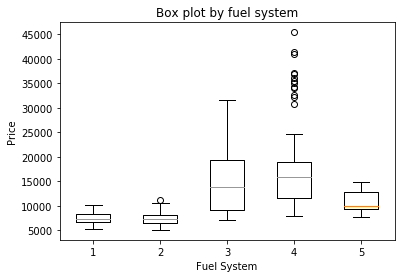

In [146]:
#assign variables, drop fuel system counts with only 1 value
onebbl = auto_price.loc[auto_price.loc[:, 'fuel-system'] == '1bbl', 'price'].tolist()
twobbl = auto_price.loc[auto_price.loc[:, 'fuel-system'] == '2bbl', 'price'].tolist()
idi = auto_price.loc[auto_price.loc[:, 'fuel-system'] == 'idi', 'price'].tolist()
mpfi = auto_price.loc[auto_price.loc[:, 'fuel-system'] == 'mpfi', 'price'].tolist()
spdi = auto_price.loc[auto_price.loc[:, 'fuel-system'] == 'spdi', 'price'].tolist()


plt.boxplot([onebbl, twobbl, idi, mpfi, spdi])
plt.ylabel('Price')
plt.xlabel('Fuel System')
plt.title('Box plot by fuel system')

In [147]:
f_statistic, p_value = ss.f_oneway(onebbl, twobbl, idi, mpfi, spdi) # fill in parameters
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 26.613227854152395
P-value = 1.687377774108041e-17


In [148]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df = pd.DataFrame({'vals': onebbl + twobbl + idi + mpfi + spdi,
                   'group_num': ['1'] * 11 + ['2'] * 64 + ['3'] * 20 + ['4'] * 89 + ['5'] * 9})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
group1 group2  meandiff     lower      upper    reject
------------------------------------------------------
  1      2    -122.3423   -6000.3678 5755.6831  False 
  1      3    8282.6045   1522.4493  15042.7598  True 
  1      4    10251.6231   4495.954  16007.2922  True 
  1      5     3434.899   -4659.4992 11529.2971 False 
  2      3    8404.9469   3791.5393  13018.3544  True 
  2      4    10373.9654  7422.4308  13325.5001  True 
  2      5    3557.2413   -2853.9295 9968.4122  False 
  3      4    1969.0185   -2487.4455 6425.4826  False 
  3      5    -4847.7056 -12076.2342 2380.8231  False 
  4      5    -6816.7241  -13115.903 -517.5452   True 
------------------------------------------------------


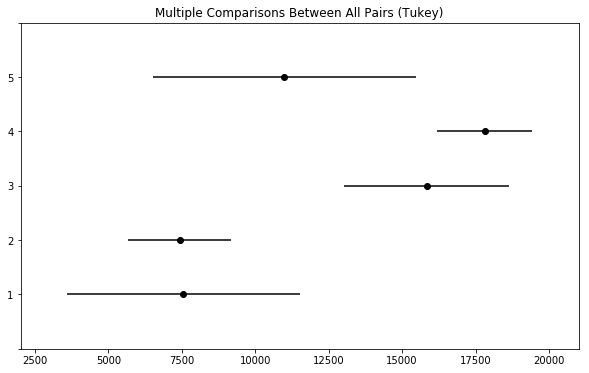

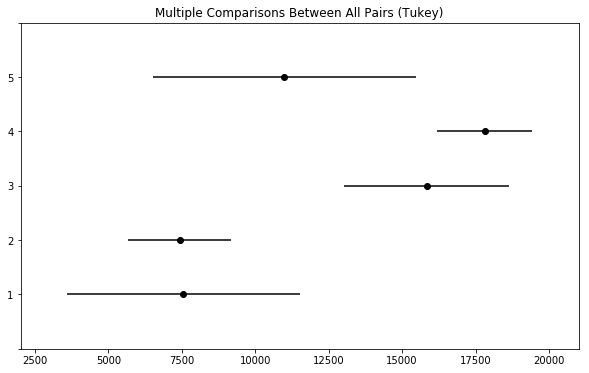

In [149]:
Tukey_HSD.plot_simultaneous()